In [138]:
import pandas as pd
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [139]:
bitcoin.drop(range(362),inplace=True)
bitcoin.drop(range(2915, 2990),inplace=True)
bitcoin.head(10)

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
362,GDAX.BTC-USD,D,20160101,0,430.35,437.15,427.92,435.66,3788
363,GDAX.BTC-USD,D,20160102,0,435.67,437.56,432.41,435.40,3195
364,GDAX.BTC-USD,D,20160103,0,435.40,435.75,425.02,431.91,3840
365,GDAX.BTC-USD,D,20160104,0,431.90,435.79,431.37,433.85,5848
366,GDAX.BTC-USD,D,20160105,0,433.84,435.64,430.00,433.34,5111
367,GDAX.BTC-USD,D,20160106,0,433.32,433.46,428.15,430.87,5441
368,GDAX.BTC-USD,D,20160107,0,430.66,460.15,430.64,459.07,13878
369,GDAX.BTC-USD,D,20160108,0,459.07,464.40,447.53,454.44,8317
370,GDAX.BTC-USD,D,20160109,0,454.41,456.00,447.66,450.38,4192
371,GDAX.BTC-USD,D,20160110,0,450.39,451.39,442.96,449.99,3898


In [140]:
bitcoin = bitcoin.iloc[:,[2,7]]
bitcoin.columns = ['Date', 'Close']
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
smp500 = smp500[['Date','Close']]

table = smp500.set_index('Date').join(bitcoin.set_index('Date'), lsuffix='-')
table = table.dropna()
table.columns = ['smp500', 'bitcoin']
table

,smp500,bitcoin
Date,,
2016-01-04,2012.66,433.85
2016-01-05,2016.71,433.34
2016-01-06,1990.26,430.87
2016-01-07,1943.09,459.07
2016-01-08,1922.03,454.44
...,...,...
2022-12-23,3844.82,16777.21
2022-12-27,3829.25,16698.73
2022-12-28,3783.22,16539.66


<AxesSubplot: xlabel='Date'>

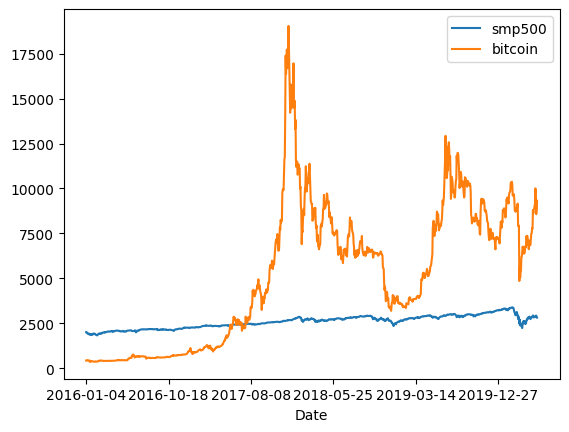

In [141]:
table.iloc[0:365*3].plot()

In [142]:
table.index =pd.to_datetime(table.index)
table['Year']=table.index.year
table['Mon']=table.index.month
table['Day']=table.index.day
dates=table[['Year','Mon','Day']]

table.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
table.iloc[:, :2]

smp500   bitcoin
Year Mon Day                   
2016 1   4    2012.66    433.85
         5    2016.71    433.34
         6    1990.26    430.87
         7    1943.09    459.07
         8    1922.03    454.44
...               ...       ...
2022 12  23   3844.82  16777.21
         27   3829.25  16698.73
         28   3783.22  16539.66
         29   3849.28  16627.54
         30   3839.50  16600.10

[1759 rows x 2 columns]

In [143]:
table['difference'] = table['bitcoin']-table['smp500']
table

smp500   bitcoin  Year  Mon  Day  difference
Year Mon Day                                               
2016 1   4    2012.66    433.85  2016    1    4    -1578.81
         5    2016.71    433.34  2016    1    5    -1583.37
         6    1990.26    430.87  2016    1    6    -1559.39
         7    1943.09    459.07  2016    1    7    -1484.02
         8    1922.03    454.44  2016    1    8    -1467.59
...               ...       ...   ...  ...  ...         ...
2022 12  23   3844.82  16777.21  2022   12   23    12932.39
         27   3829.25  16698.73  2022   12   27    12869.48
         28   3783.22  16539.66  2022   12   28    12756.44
         29   3849.28  16627.54  2022   12   29    12778.26
         30   3839.50  16600.10  2022   12   30    12760.60

[1759 rows x 6 columns]

In [144]:
year_day_mean=table.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['difference']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
tmpmn.head()

Year  Mon
2016  1     -1506.113158
      2     -1504.169500
      3     -1605.904545
      4     -1639.286190
      5     -1608.572381
Name: difference, dtype: float64

In [145]:
corr=table[['bitcoin', 'smp500']].corr()
corr

,bitcoin,smp500
bitcoin,1.000000,0.894736
smp500,0.894736,1.000000


([<matplotlib.axis.YTick at 0x23c2cd21180>,
 [Text(0, 0, 'bitcoin'), Text(0, 1, 'smp500')])

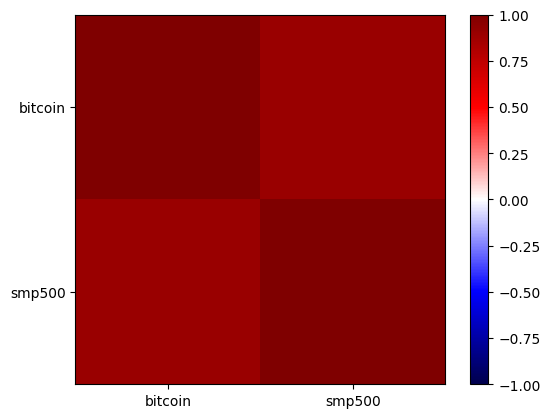

In [146]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

In [147]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,0.978835,0.956303,0.941091,0.925339,0.907071,0.876047,0.813701,0.785318,0.736087,0.675057,0.605385
Feb,0.978835,1.000000,0.994430,0.988840,0.980236,0.966224,0.942944,0.907993,0.888155,0.852941,0.805659,0.740843
Mar,0.956303,0.994430,1.000000,0.998664,0.992145,0.978070,0.959434,0.937063,0.922833,0.895118,0.849806,0.777229
Apr,0.941091,0.988840,0.998664,1.000000,0.996074,0.984792,0.969242,0.952410,0.940024,0.914628,0.872378,0.799774
May,0.925339,0.980236,0.992145,0.996074,1.000000,0.994688,0.985705,0.971913,0.960624,0.935446,0.898311,0.826099
Jun,0.907071,0.966224,0.978070,0.984792,0.994688,1.000000,0.996454,0.979899,0.966752,0.936285,0.902155,0.833131
Jul,0.876047,0.942944,0.959434,0.969242,0.985705,0.996454,1.000000,0.987246,0.976206,0.946783,0.915563,0.840870
Aug,0.813701,0.907993,0.937063,0.952410,0.971913,0.979899,0.987246,1.000000,0.998024,0.985282,0.967244,0.904435
Sep,0.785318,0.888155,0.922833,0.940024,0.960624,0.966752,0.976206,0.998024,1.000000,0.993742,0.978924,0.915796
Oct,0.736087,0.852941,0.895118,0.914628,0.935446,0.936285,0.946783,0.985282,0.993742,1.000000,0.992832,0.935988


([<matplotlib.axis.YTick at 0x23c2b7295d0>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

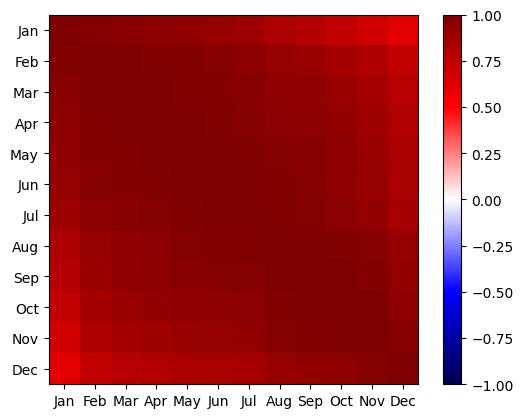

In [148]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)